# Resistive one-ports (Resistive Eintore)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 2-dimensional operation plane (2-dimensionale Betriebsebene)
* $F_{ui}$ is a 2D vector space $\mathbb{R}^2$
* The map of all physically possible states
* Component - subset of this plane (line, curve)
$$
\mathcal{F}_{ui} = \left\{ (u,i) | \frac{u}{V} \in \mathbb{R}, \frac{i}{A} \in \mathbb{R} \right\}
$$

**Implicit Representation (Implizite Darstellung)**
* $\mathcal{F}$ is a set of points in the operation plane following the implicit function $f_{\mathcal{F}_{ui}}(u,i) = 0$
* $f_{\mathcal{F}_{ui}}$ is a function of the operation plane
$$
\mathcal{F} = \left\{ (u,i) | f_{\mathcal{F}_{ui}}(u,i) = 0 \right\}
$$
* Example of implicit representation:
$$
\frac{i}{i_0} - \arctan(\frac{u}{u_0}) = 0
$$

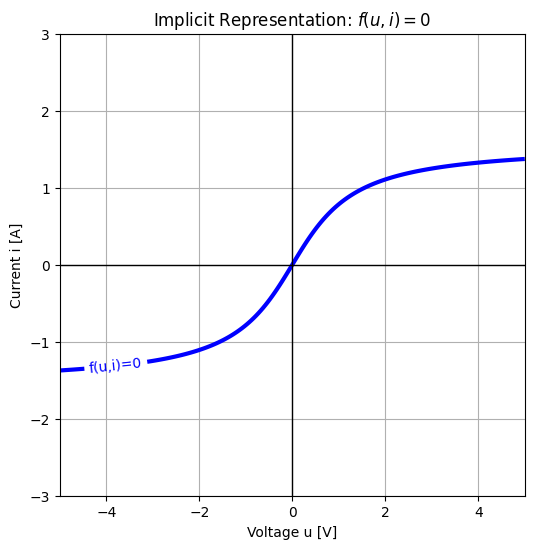

In [ ]:
u_range = np.linspace(-5, 5, 200)
i_range = np.linspace(-3, 3, 200)
U, I = np.meshgrid(u_range, i_range)

u0 = 1.0
i0 = 1.0

# The Implicit Function: f(u, i)
# We find where Z = 0
Z = (I / i0) - np.arctan(U / u0)

plt.figure(figsize=(6, 6))

CS = plt.contour(U, I, Z, levels=[0], colors='blue', linewidths=3)
plt.clabel(CS, inline=1, fontsize=10, fmt='f(u,i)=0')

plt.title("Implicit Representation: $f(u,i)=0$")
plt.xlabel("Voltage u [V]")
plt.ylabel("Current i [A]")
plt.grid(True)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.show()

**Parametric Representation (Parametrische Darstellung)**
* $\lambda$ is a parameter (e.g. time)
$$
\mathcal{F} = \left\{ (u_f(\lambda),i_f(\lambda)) | \lambda \in \mathbb{R} \right\}
$$
* Example of parametric representation:
* $ \lambda \in (-\pi/2, \pi/2) $
$$
i = i_0 \cdot \lambda
$$
$$
u = u_0 \cdot \tan(\lambda)
$$

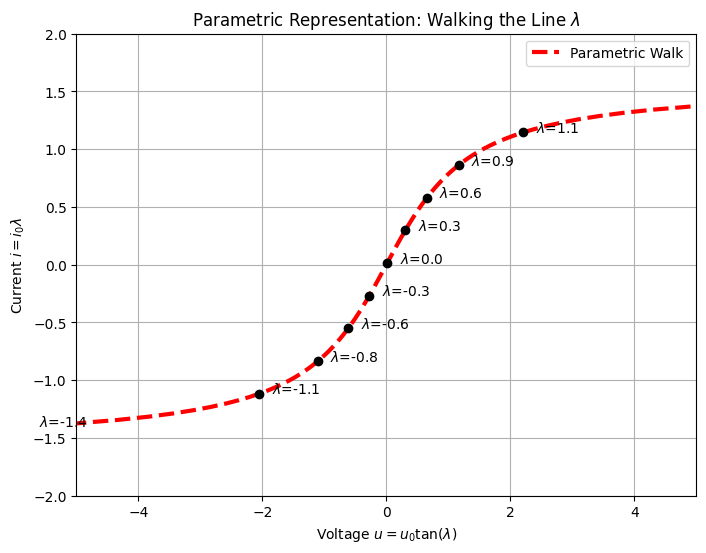

In [9]:
u0 = 1.0
i0 = 1.0

lam = np.linspace(-1.4, 1.4, 100) 

u_param = u0 * np.tan(lam)
i_param = i0 * lam

plt.figure(figsize=(8, 6))

plt.plot(u_param, i_param, 'r--', linewidth=3, label='Parametric Walk')

step = 10
plt.scatter(u_param[::step], i_param[::step], color='black', zorder=5)

for l, u_p, i_p in zip(lam[::step], u_param[::step], i_param[::step]):
    plt.text(u_p + 0.2, i_p, rf"$\lambda$={l:.1f}")

plt.title(r"Parametric Representation: Walking the Line $\lambda$")
plt.xlabel(r"Voltage $u = u_0 \tan(\lambda)$")
plt.ylabel(r"Current $i = i_0 \lambda$")
plt.xlim(-5, 5)
plt.ylim(-2, 2)
plt.grid(True)
plt.legend()
plt.show()

**Explicit Representation (Explizite Darstellung)**
* Voltage Controlled (Spannungsgesteuerte):
$$
i = g_f(u)
$$

* Current Controlled (Stromgesteuerte):
$$
u = r_f(i)
$$

* Example: Tunnel Diode - only voltage controlled as current controlled is not a function
$$
i = 3u^3 - 2u^2 + 0.5u
$$

## Duality (Dualität)
* Given $\mathcal{F}$, its dual $\mathcal{F}^d$ is found by swapping $u$ and $i$
* Scaled by $R_d$
* Example: Tunnel Diode
$$
i = 3u^3 - 2u^2 + 0.5u
$$
$$
u = 3i^3 - 2i^2 + 0.5i
$$


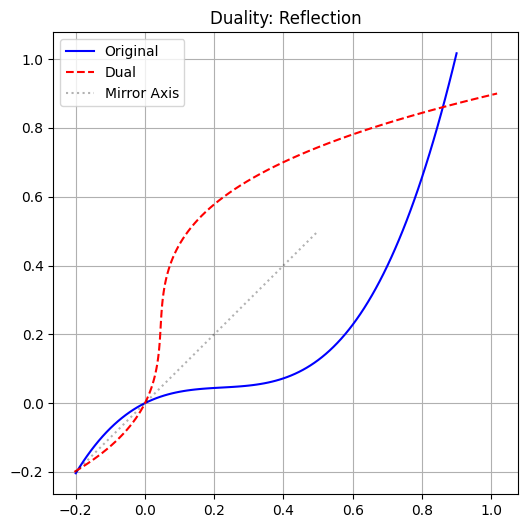

In [13]:
# Original Tunnel Diode (Voltage Controlled)
u_orig = np.linspace(-0.2, 0.9, 100)
i_orig = 3*u_orig**3 - 2*u_orig**2 + 0.5*u_orig

# Dual Transformation (Swap u and i)
# Let Rd = 1 (Simple swap)
u_dual = i_orig
i_dual = u_orig

plt.figure(figsize=(6, 6))
plt.plot(u_orig, i_orig, 'b-', label='Original')
plt.plot(u_dual, i_dual, 'r--', label='Dual')
plt.plot([-0.2, 0.5], [-0.2, 0.5], 'k:', alpha=0.3, label='Mirror Axis')

plt.title("Duality: Reflection")
plt.legend()
plt.grid(True)
plt.show()

## Properties of resistive one-ports (Eigenschaften resistiver Eintore)

**Unpoled (ungepolt)**
* One can change the ports and functioning of the port is the same
$$
\forall (u,i) \in \mathcal{F} \implies (-u,-i) \in \mathcal{F}
$$

**Poled (gepolt)**
* For instance diodes, LEDs, etc.
$$
\exists (u,i) \in \mathcal{F} \implies (-u,-i) \notin \mathcal{F}
$$

**Active (aktiv)**
* Can generate power
* $P = UI$
* Positive power $P > 0$ implies power generation
$$
\exists (u,i) \in \mathcal{F} \implies ui < 0
$$

**Passive (passiv)**
* Can only consume power
* Acts as a consumer or load
$$
\forall (u,i) \in \mathcal{F} \implies ui \geq 0
$$

**Lossless (verlustlos)**
* No power is dissipated
* All power is returned to the network
$$
\forall (u,i) \in \mathcal{F} \implies ui = 0
$$

**Lossy (verlustbehaftet)**
* Power is dissipated
$$
\exists (u,i) \in \mathcal{F} \implies ui \neq 0
$$





## Linear Sources (Lineare Quellen)
* One-port is strongly linear if
$$
\forall (u,i) \in \mathcal{F} \implies (ku,ki) \in \mathcal{F}
$$
$$
\forall (u_1,i_1), (u_2,i_2) \in \mathcal{F} \implies (u_1 + u_2, i_1 + i_2) \in \mathcal{F}
$$
* Always source free (quellenfrei) - $(0,0) \in \mathcal{F}$
* Not poled (ungepolt)
* Vector space (Vektorraum)

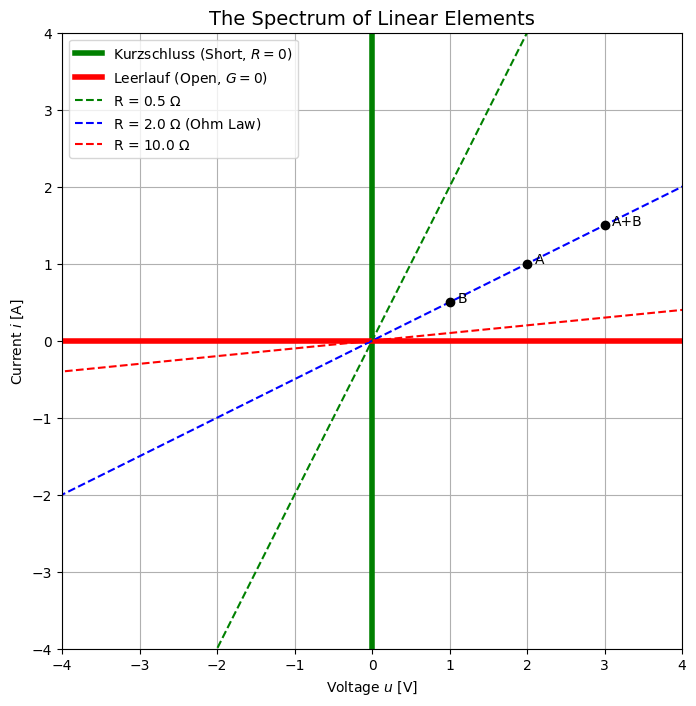

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Create the figure
plt.figure(figsize=(8, 8))

# 1. THE KURZSCHLUSS (Short Circuit)
# Condition: u = 0, i = anything (Vertical Axis)
plt.axvline(0, color='green', linewidth=4, label=r'Kurzschluss (Short, $R=0$)')

# 2. THE LEERLAUF (Open Circuit)
# Condition: i = 0, u = anything (Horizontal Axis)
plt.axhline(0, color='red', linewidth=4, label=r'Leerlauf (Open, $G=0$)')

# 3. Normal Strongly Linear Resistors
# As R increases, the line rotates Clockwise from Vertical to Horizontal
u = np.linspace(-5, 5, 100)

# Low Resistance (Close to Short)
# We use r'' strings here to fix the SyntaxWarning
plt.plot(u, u / 0.5, 'g--', label=r'R = 0.5 $\Omega$')

# Medium Resistance
plt.plot(u, u / 2.0, 'b--', label=r'R = 2.0 $\Omega$ (Ohm Law)')

# High Resistance (Close to Open)
plt.plot(u, u / 10.0, 'r--', label=r'R = 10.0 $\Omega$')

# Formatting
plt.title('The Spectrum of Linear Elements', fontsize=14)
plt.xlabel('Voltage $u$ [V]')
plt.ylabel('Current $i$ [A]')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid(True)
plt.legend()

# Visualizing "Linearity" (Superposition)
# Linearity means: If Point A is on the line, and Point B is on the line,
# then Point (A+B) MUST be on the line.
pA = np.array([2, 1])    # 2V, 1A (on the blue line)
pB = np.array([1, 0.5])  # 1V, 0.5A (on the blue line)
pSum = pA + pB           # 3V, 1.5A

plt.scatter([2, 1, 3], [1, 0.5, 1.5], color='black', zorder=5)
plt.annotate("A", (2.1, 1))
plt.annotate("B", (1.1, 0.5))
plt.annotate("A+B", (3.1, 1.5))

plt.show()

**Null-Port (Nullator)**
$$
\mathcal{F}_0 = \{(0,0)\}
$$
* Theoretical component
* $u = 0$
* $i = 0$
* Loss-free as $P = ui = 0$
* Dual
* Short circuit (Kurzschluss)
* Open circuit (Leerlauf)

**Norator (Norator)**
$$
\mathcal{F}_\infty = \mathcal{F}_{ui}
$$
* Theoretical component
* Strongly linear
* Loss-free as $P = ui = 0$

## One-Port Circuits (Eintorschaltungen)
